In [ ]:
pip install scipy

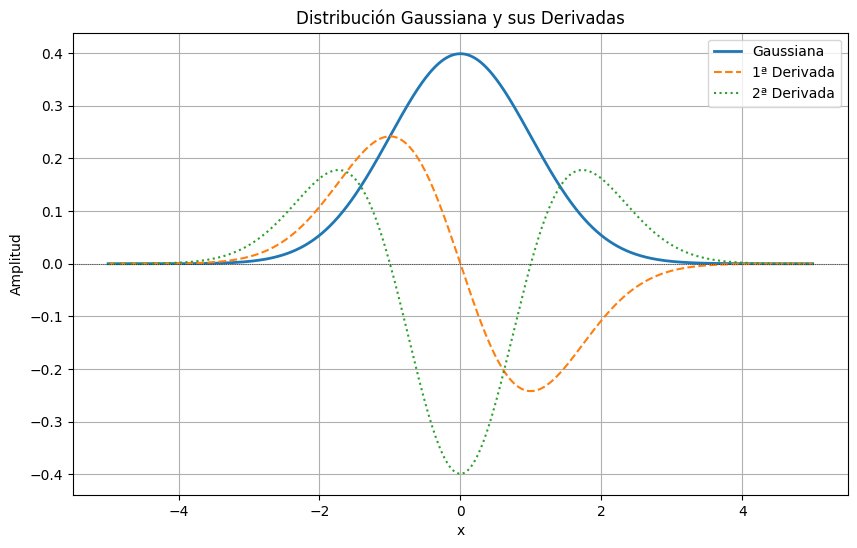

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def gaussian(x, sigma):
    return (1 / (np.sqrt(2 * np.pi) * sigma)) * np.exp(-x**2 / (2 * sigma**2))

def gaussian_first_derivative(x, sigma):
    return -x / (sigma**2) * gaussian(x, sigma)

def gaussian_second_derivative(x, sigma):
    return (x**2 - sigma**2) / (sigma**4) * gaussian(x, sigma)

# Valores de x
x = np.linspace(-5, 5, 500)

# Parámetros de la gaussiana
sigma = 1
sigma1 = 1
sigma2 = 1.5  # Para la DoG

# Cálculo de funciones
g = gaussian(x, sigma)
g_prime = gaussian_first_derivative(x, sigma)
g_double_prime = gaussian_second_derivative(x, sigma)

# Graficar
plt.figure(figsize=(10, 6))
plt.plot(x, g, label='Gaussiana', linewidth=2)
plt.plot(x, g_prime, label='1ª Derivada', linestyle='dashed')
plt.plot(x, g_double_prime, label='2ª Derivada', linestyle='dotted')


plt.axhline(0, color='black', linewidth=0.5, linestyle='dotted')
plt.legend()
plt.xlabel('x')
plt.ylabel('Amplitud')
plt.title('Distribución Gaussiana y sus Derivadas')
plt.grid()
plt.show()


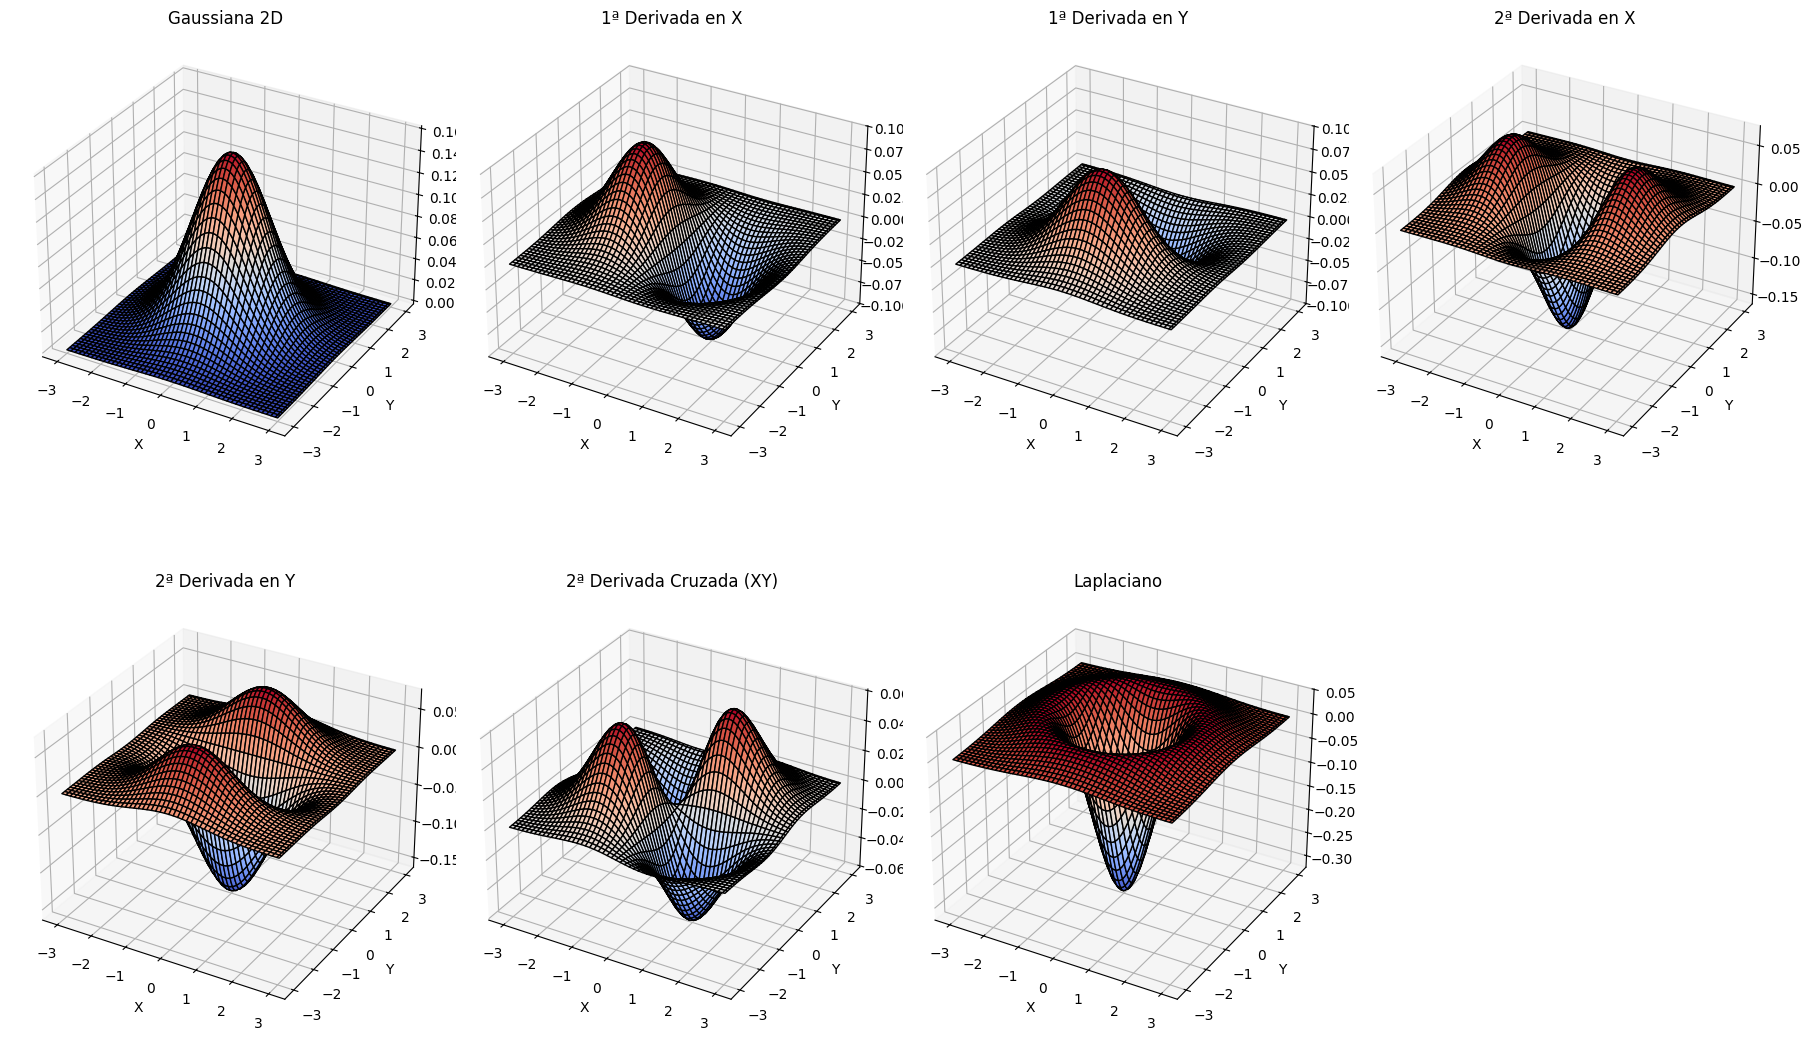

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def gaussian_2d(x, y, sigma):
    return np.exp(-(x**2 + y**2) / (2 * sigma**2)) / (2 * np.pi * sigma**2)

def gaussian_first_derivative_2d(x, y, sigma):
    gx = -x / (sigma**2) * gaussian_2d(x, y, sigma)
    gy = -y / (sigma**2) * gaussian_2d(x, y, sigma)
    return gx, gy

def gaussian_second_derivative_2d(x, y, sigma):
    gxx = (x**2 - sigma**2) / (sigma**4) * gaussian_2d(x, y, sigma)
    gyy = (y**2 - sigma**2) / (sigma**4) * gaussian_2d(x, y, sigma)
    gxy = (x * y) / (sigma**4) * gaussian_2d(x, y, sigma)
    return gxx, gyy, gxy

def laplacian_2d(x, y, sigma):
    gxx, gyy, _ = gaussian_second_derivative_2d(x, y, sigma)
    return gxx + gyy

# Definir el rango y la malla
sigma = 1
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x, y)

# Calcular funciones
g = gaussian_2d(X, Y, sigma)
gx, gy = gaussian_first_derivative_2d(X, Y, sigma)
gxx, gyy, gxy = gaussian_second_derivative_2d(X, Y, sigma)
laplacian = laplacian_2d(X, Y, sigma)

# Función para graficar en 3D
def plot_3d(ax, X, Y, Z, title):
    ax.plot_surface(X, Y, Z, cmap='coolwarm', edgecolor='k')
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')

# Crear figuras
fig = plt.figure(figsize=(18, 12))

ax1 = fig.add_subplot(241, projection='3d')
plot_3d(ax1, X, Y, g, 'Gaussiana 2D')

ax2 = fig.add_subplot(242, projection='3d')
plot_3d(ax2, X, Y, gx, '1ª Derivada en X')

ax3 = fig.add_subplot(243, projection='3d')
plot_3d(ax3, X, Y, gy, '1ª Derivada en Y')

ax4 = fig.add_subplot(244, projection='3d')
plot_3d(ax4, X, Y, gxx, '2ª Derivada en X')

ax5 = fig.add_subplot(245, projection='3d')
plot_3d(ax5, X, Y, gyy, '2ª Derivada en Y')

ax6 = fig.add_subplot(246, projection='3d')
plot_3d(ax6, X, Y, gxy, '2ª Derivada Cruzada (XY)')

ax7 = fig.add_subplot(247, projection='3d')
plot_3d(ax7, X, Y, laplacian, 'Laplaciano')

plt.tight_layout()
plt.show()

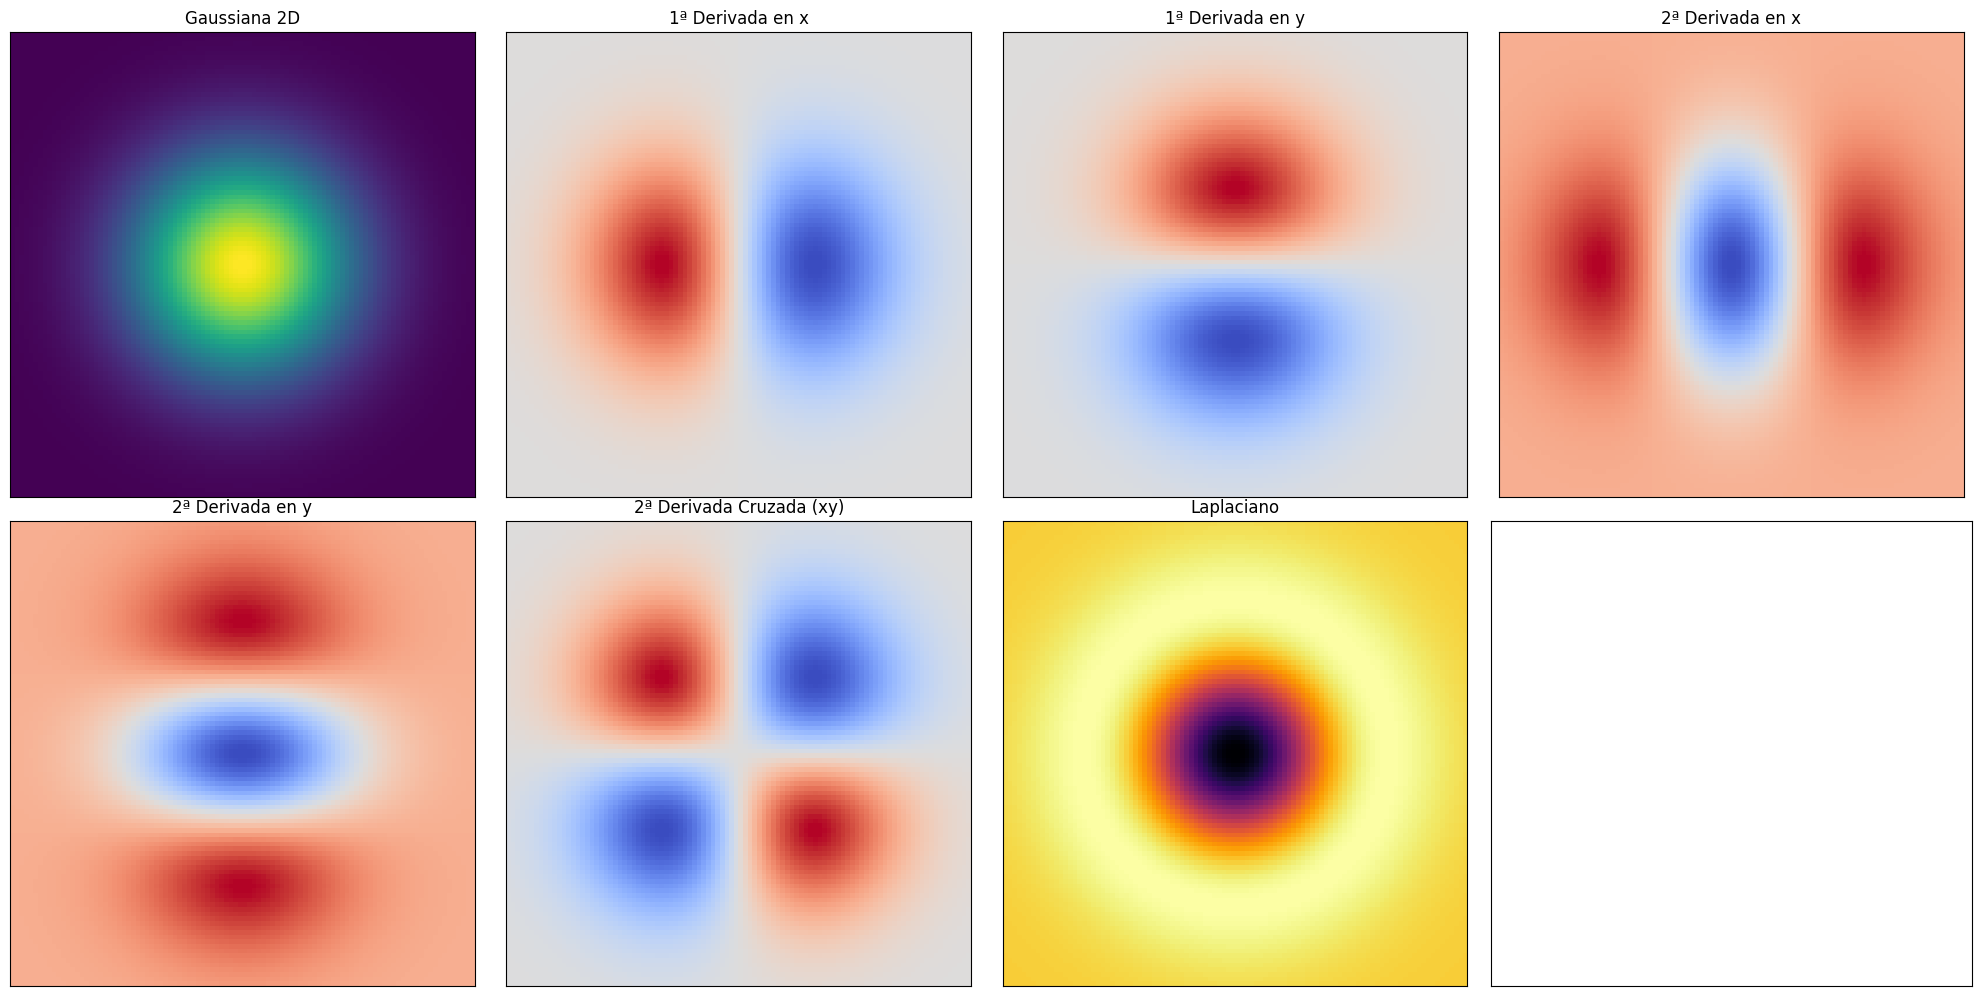

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter, gaussian_gradient_magnitude, gaussian_laplace

def gaussian_2d(x, y, sigma):
    return np.exp(-(x**2 + y**2) / (2 * sigma**2)) / (2 * np.pi * sigma**2)

def gaussian_first_derivative_2d(x, y, sigma):
    gx = -x / (sigma**2) * gaussian_2d(x, y, sigma)
    gy = -y / (sigma**2) * gaussian_2d(x, y, sigma)
    return gx, gy

def gaussian_second_derivative_2d(x, y, sigma):
    gxx = (x**2 - sigma**2) / (sigma**4) * gaussian_2d(x, y, sigma)
    gyy = (y**2 - sigma**2) / (sigma**4) * gaussian_2d(x, y, sigma)
    gxy = (x * y) / (sigma**4) * gaussian_2d(x, y, sigma)
    return gxx, gyy, gxy

def hessian_2d(x, y, sigma):
    gxx, gyy, gxy = gaussian_second_derivative_2d(x, y, sigma)
    return np.array([[gxx, gxy], [gxy, gyy]])

def laplacian_2d(x, y, sigma):
    gxx, gyy, _ = gaussian_second_derivative_2d(x, y, sigma)
    return gxx + gyy

# Definir el rango y la malla
sigma = 1
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x, y)

# Calcular funciones
g = gaussian_2d(X, Y, sigma)
gx, gy = gaussian_first_derivative_2d(X, Y, sigma)
gxx, gyy, gxy = gaussian_second_derivative_2d(X, Y, sigma)
hessian = hessian_2d(X, Y, sigma)
laplacian = laplacian_2d(X, Y, sigma)

# Graficar
fig, axs = plt.subplots(2, 4, figsize=(20, 10))

axs[0, 0].imshow(g, extent=(-3, 3, -3, 3), cmap='viridis')
axs[0, 0].set_title('Gaussiana 2D')

axs[0, 1].imshow(gx, extent=(-3, 3, -3, 3), cmap='coolwarm')
axs[0, 1].set_title('1ª Derivada en x')

axs[0, 2].imshow(gy, extent=(-3, 3, -3, 3), cmap='coolwarm')
axs[0, 2].set_title('1ª Derivada en y')

axs[0, 3].imshow(gxx, extent=(-3, 3, -3, 3), cmap='coolwarm')
axs[0, 3].set_title('2ª Derivada en x')

axs[1, 0].imshow(gyy, extent=(-3, 3, -3, 3), cmap='coolwarm')
axs[1, 0].set_title('2ª Derivada en y')

axs[1, 1].imshow(gxy, extent=(-3, 3, -3, 3), cmap='coolwarm')
axs[1, 1].set_title('2ª Derivada Cruzada (xy)')

axs[1, 2].imshow(laplacian, extent=(-3, 3, -3, 3), cmap='inferno')
axs[1, 2].set_title('Laplaciano')

for ax in axs.flat:
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.show()